In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sail.models.keras import KerasSequentialClassifier

from sklearn.model_selection import train_test_split
from sail.transformers.river.preprocessing import StandardScaler

#### Load Data


In [11]:
iris = load_iris()
X = iris["data"]
y = iris["target"]
names = iris["target_names"]
feature_names = iris["feature_names"]

# Scale data to have mean 0 and variance 1
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2
)

#### Model Definition


In [12]:
model = KerasSequentialClassifier(
    num_hidden_nodes=[10, 20, 50],
    hidden_layer_activation=["relu", "relu", "relu"],
    num_output_nodes=1,
    outer_layer_activation="sigmoid",
)

#### Start Training


In [13]:
X_scaled.shape

(150, 4)

In [14]:
y_preds = []
y_true = []
batch_size = 1

for start in range(0, X_scaled.shape[0], batch_size):
    end = start + batch_size

    X_train = X_scaled[start:end, :]
    y_train = y[start:end]

    if start != 0:
        preds = model.predict(X_train)
        if preds is not None:
            y_preds.extend(list(preds))
            y_true.extend(list(y_train))
    else:
        model.partial_fit(X_train, y_train, classes=[0, 1, 2])

#### Save model


In [15]:
model.save_model("./model")

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets
[2023-12-12 17:18:44:988] - INFO - SAIL (TF_Keras) - Model saved successfully.


#### Classification Report


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.33      1.00      0.49        49
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       149
   macro avg       0.11      0.33      0.16       149
weighted avg       0.11      0.33      0.16       149



/Users/dhaval/.pyenv/versions/3.10.10/envs/sail/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhaval/.pyenv/versions/3.10.10/envs/sail/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dhaval/.pyenv/versions/3.10.10/envs/sail/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

#### Plot confusion matrix


<Axes: >

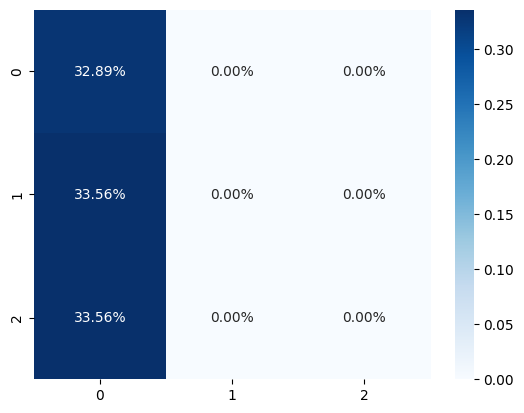

In [17]:
import seaborn as sns

cf_matrix = confusion_matrix(y_true, y_preds)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Blues")